In [324]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [325]:
df = pd.read_csv('./bakery.csv')

In [326]:
df.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [306]:
print('Dataset has',df.shape[0],"rows &",df.shape[1],"columns")
print("Null items in bakery dataset: ",sum(df.Item.isnull()))
print("NA items in bakery dataset: ",sum(df.Item.isna()))


Dataset has 21293 rows & 4 columns
Null items in bakery dataset:  0
NA items in bakery dataset:  0


{'Coffee': 5471, 'Bread': 3325, 'Tea': 1435, 'Cake': 1025, 'Pastry': 856, 'NONE': 786, 'Sandwich': 771, 'Medialuna': 616, 'Hot chocolate': 590, 'Cookies': 540, 'Brownie': 379, 'Farm House': 374, 'Muffin': 370, 'Juice': 369, 'Alfajores': 369, 'Soup': 342, 'Scone': 327, 'Toast': 318, 'Scandinavian': 277, 'Truffles': 193, 'Coke': 185, 'Spanish Brunch': 172, 'Fudge': 159, 'Baguette': 152, 'Jam': 149, 'Tiffin': 146, 'Mineral water': 136, 'Jammie Dodgers': 125, 'Chicken Stew': 123, 'Hearty & Seasonal': 107, 'Salad': 99, 'Frittata': 81, 'Smoothies': 77, 'Keeping It Local': 63, 'The Nomad': 58, 'Focaccia': 54, 'Vegan mincepie': 54, 'Bakewell': 48, 'Tartine': 47, 'Afternoon with the baker': 44, 'Extra Salami or Feta': 38, 'Art Tray': 38, 'Eggs': 28, 'Granola': 28, 'Tshirt': 21, 'My-5 Fruit Shoot': 18, "Ella's Kitchen Pouches": 17, 'Vegan Feast': 16, 'Crisps': 14, "Valentine's card": 13, 'Dulce de Leche': 13, 'Kids biscuit': 12, 'Duck egg': 12, 'Pick and Mix Bowls': 12, 'Mighty Protein': 11, 'Ta

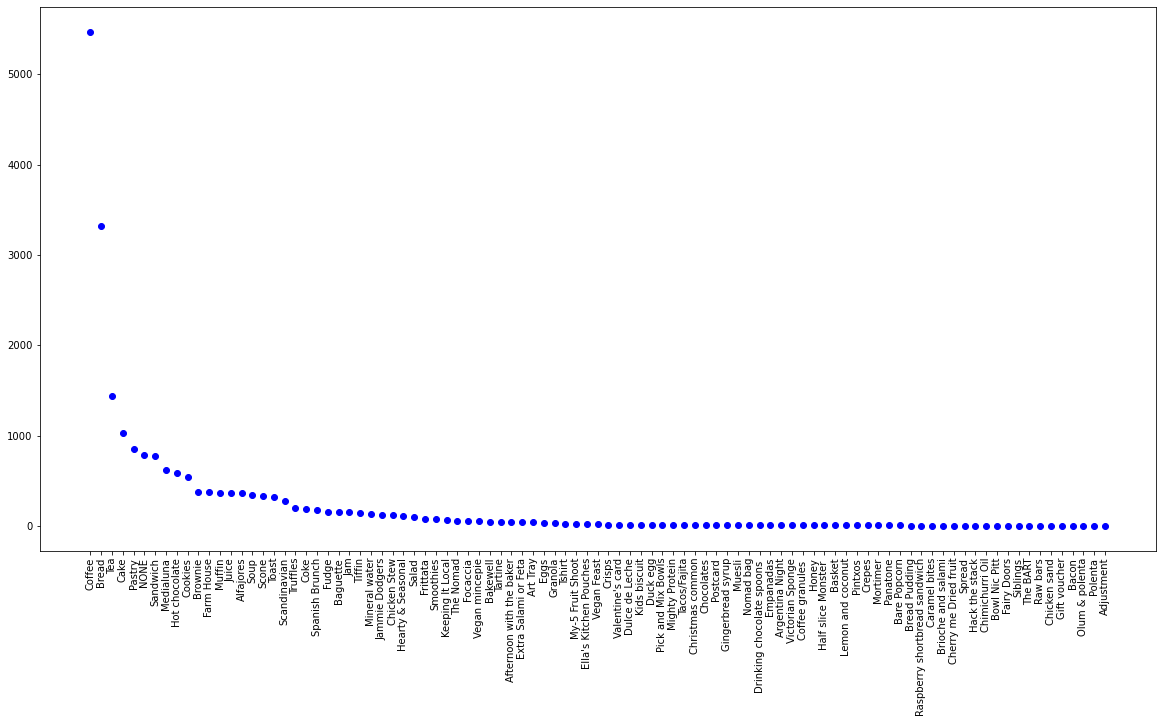

In [327]:
distinct_vals = dict(df.Item.value_counts())
print(distinct_vals)
plt.figure(figsize=(20,10))
plt.plot(df.Item.value_counts(),'bo')
plt.xticks(rotation=90)
plt.show()

In [328]:
print("Dataframe before dropping irrelevant rows",df.shape)
del_index = df[(df['Item']=='Adjustment')].index
df.drop(del_index,inplace=True)
del_index = df[df['Item']=='NONE'].index
df.drop(del_index,inplace=True)
print("Dataframe after dropping irrelevant rows",df.shape)

Dataframe before dropping irrelevant rows (21293, 4)
Dataframe after dropping irrelevant rows (20506, 4)


In [309]:
dup = df[df.duplicated()==True]
# print(dup)
print("Duplicated items in dataset: ",len(dup))

Duplicated items in dataset:  1620


In [310]:
print("Dataframe before dropping duplicates",df.shape)
df.drop_duplicates(keep='first',inplace=True)
print("Dataframe after dropping duplicates",df.shape)

Dataframe before dropping duplicates (20506, 4)
Dataframe after dropping duplicates (18886, 4)


In [311]:
print("Unique transactions:",len(df.Transaction.unique()))

Unique transactions: 9464


In [312]:
grouped_df = df.groupby(by="Transaction")["Item"].apply(list).reset_index()
grouped_df

,Transaction,Item
0,1,[Bread]
1,2,[Scandinavian]
2,3,"[Hot chocolate, Jam, Cookies]"
3,4,[Muffin]
4,5,"[Coffee, Pastry, Bread]"
...,...,...
9459,9680,[Bread]
9460,9681,"[Truffles, Tea, Spanish Brunch, Christmas common]"
9461,9682,"[Muffin, Tacos/Fajita, Coffee, Tea]"
9462,9683,"[Coffee, Pastry]"


In [459]:
from apyori import apriori
MIN_SUPPORT = 0.003
MIN_CONF = 0.1
MAX_LEN = 5

In [429]:
itemset = list(grouped_df['Item'])
itemset[:5]

[['Bread'],
 ['Scandinavian'],
 ['Hot chocolate', 'Jam', 'Cookies'],
 ['Muffin'],
 ['Coffee', 'Pastry', 'Bread']]

In [460]:
rules = apriori(itemset,min_support=MIN_SUPPORT,min_confidence=MIN_CONF,max_length=MAX_LEN)
rules

<generator object apriori at 0x1A3DF730>

In [461]:
result_df = pd.DataFrame(list(rules))
result_df

,items,support,ordered_statistics
0,(Bread),0.327240,"[((), (Bread), 0.327240067624683, 1.0)]"
1,(Cake),0.103867,"[((), (Cake), 0.10386728655959425, 1.0)]"
2,(Coffee),0.478445,"[((), (Coffee), 0.47844463229078615, 1.0)]"
3,(Tea),0.142646,"[((), (Tea), 0.1426458157227388, 1.0)]"
4,"(Bread, Alfajores)",0.010355,"[((Alfajores), (Bread), 0.28488372093023256, 0..."
...,...,...,...
123,"(Tea, Coffee, Pastry)",0.004649,"[((Tea, Pastry), (Coffee), 0.48351648351648346..."
124,"(Sandwich, Coffee, Soup)",0.003593,"[((Soup), (Sandwich, Coffee), 0.10429447852760..."
125,"(Tea, Sandwich, Coffee)",0.005389,"[((Sandwich, Coffee), (Tea), 0.140883977900552..."
126,"(Tea, Scone, Coffee)",0.003381,"[((Scone, Coffee), (Tea), 0.1871345029239766, ..."


In [462]:
first = []
second = []
third = []
fourth = []
support = []

# loop number of rows time and append 1 by 1 value in a separate list.. first and second element was frozenset which need to be converted in list..
for i in range(result_df.shape[0]):
    for single_list in result_df['ordered_statistics'][i]:
    # single_list = result_df['ordered_statistics'][i][0]
        first.append(','.join(list(single_list[0])))
        second.append(','.join(list(single_list[1])))
        third.append(single_list[2])
        fourth.append(single_list[3])
        support.append(result_df['support'][i])

In [463]:
lhs = pd.DataFrame(first,columns=['lhs'])
rhs= pd.DataFrame(second,columns=['rhs'])
support = pd.DataFrame(support,columns=['support'])
confidence=pd.DataFrame(third,columns=['confidence'])
lift=pd.DataFrame(fourth,columns=['lift'])

In [464]:
df_final = pd.concat([lhs,rhs,support,confidence,lift], axis=1)
df_final

,lhs,rhs,support,confidence,lift
0,,Bread,0.327240,0.327240,1.000000
1,,Cake,0.103867,0.103867,1.000000
2,,Coffee,0.478445,0.478445,1.000000
3,,Tea,0.142646,0.142646,1.000000
4,Alfajores,Bread,0.010355,0.284884,0.870565
...,...,...,...,...,...
179,"Tea,Sandwich",Coffee,0.005389,0.375000,0.783790
180,"Scone,Coffee",Tea,0.003381,0.187135,1.311882
181,"Tea,Scone",Coffee,0.003381,0.405063,0.846625
182,"Coffee,Toast",Tea,0.003276,0.138393,0.970185


In [465]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(itemset).transform(itemset)
ml_df = pd.DataFrame(te_ary, columns=te.columns_)
ml_df

,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,Bowl Nic Pitt,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9460,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
9461,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9462,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [466]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [467]:
frequent_itemsets = apriori(ml_df, min_support=MIN_SUPPORT, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.004544,(Afternoon with the baker)
1,0.036348,(Alfajores)
2,0.004015,(Art Tray)
3,0.016061,(Baguette)
4,0.005072,(Bakewell)
...,...,...
172,0.004649,"(Tea, Coffee, Pastry)"
173,0.003593,"(Sandwich, Coffee, Soup)"
174,0.005389,"(Tea, Sandwich, Coffee)"
175,0.003381,"(Tea, Scone, Coffee)"


In [468]:
rules_mlxtend = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules_mlxtend

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Alfajores),(Cake),0.036348,0.103867,0.004121,0.113372,1.091509,0.000345,1.010720
1,(Cake),(Alfajores),0.103867,0.036348,0.004121,0.039674,1.091509,0.000345,1.003464
2,(Coffee),(Alfajores),0.478445,0.036348,0.019653,0.041078,1.130115,0.002263,1.004932
3,(Alfajores),(Coffee),0.036348,0.478445,0.019653,0.540698,1.130115,0.002263,1.135538
4,(Hot chocolate),(Alfajores),0.058326,0.036348,0.003593,0.061594,1.694557,0.001473,1.026903
...,...,...,...,...,...,...,...,...,...
243,(Scone),"(Tea, Coffee)",0.034552,0.049873,0.003381,0.097859,1.962162,0.001658,1.053191
244,"(Tea, Coffee)",(Toast),0.049873,0.033601,0.003276,0.065678,1.954642,0.001600,1.034332
245,"(Tea, Toast)",(Coffee),0.006445,0.478445,0.003276,0.508197,1.062185,0.000192,1.060496
246,(Coffee),"(Tea, Toast)",0.478445,0.006445,0.003276,0.006846,1.062185,0.000192,1.000404
